#Interim Project 2
#Forecasting system- project demand at a retail outlet on a Historical Data.


#Importing Tools and Loading Given Dataset
##1. DATA PREPROCESSING 

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
%matplotlib inline
#matplotlib.rcParams['axes.labelsize'] = 14
#matplotlib.rcParams['xtick.labelsize'] = 12
#matplotlib.rcParams['ytick.labelsize'] = 12
#matplotlib.rcParams['text.color'] = 'k'
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
df =pd.read_csv('/content/gdrive/MyDrive/As/train.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
from prophet import Prophet
from datetime import datetime


In [ ]:
df["date"]= pd.to_datetime(df["date"])

In [ ]:
df.shape

(913000, 4)

In [ ]:
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [ ]:
df.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [ ]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
df.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [ ]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
df['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
df['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [ ]:
y = df.date
drop_cols = ['store','item']
x = df.drop(drop_cols, axis=1)
x

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
...,...,...
912995,2017-12-27,63
912996,2017-12-28,59
912997,2017-12-29,74
912998,2017-12-30,62


In [ ]:
sd = df.date.iloc[0]
ed = df.date.iloc[-1]

print("Start Date:", sd)
print("End Date  :", ed)

Start Date: 2013-01-01 00:00:00
End Date  : 2017-12-31 00:00:00


In [ ]:
x

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
...,...,...
912995,2017-12-27,63
912996,2017-12-28,59
912997,2017-12-29,74
912998,2017-12-30,62


In [ ]:
df.sort_values(by='date').copy

<bound method NDFrame.copy of              date  store  item  sales
0      2013-01-01      1     1     13
211816 2013-01-01      7    12     26
832656 2013-01-01      7    46     27
213642 2013-01-01      8    12     54
215468 2013-01-01      9    12     35
...           ...    ...   ...    ...
619013 2017-12-31      9    34     21
620839 2017-12-31     10    34     32
622665 2017-12-31      1    35     55
598927 2017-12-31      8    33    100
912999 2017-12-31     10    50     82

[913000 rows x 4 columns]>

In [ ]:
df=x.reset_index(drop=True)
df=x.set_index('date')

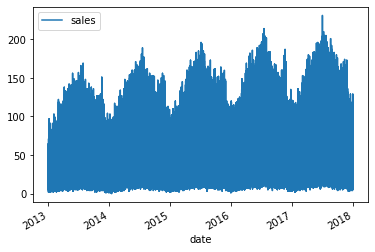

In [ ]:
df.plot()

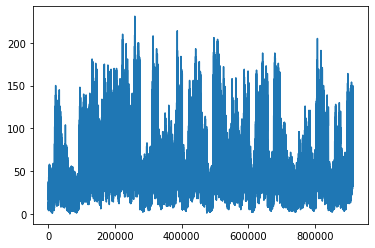

In [ ]:
x['sales'].plot()

##2. INDEXCING WITH TIMESERIES


In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=913000, freq=None)

In [ ]:
#index=df.loc['2013-01-01':'2017-12-31'].index
forecaste_open=df.loc['2013-01-01':'2017-12-31']

In [ ]:
forecaste_open

,date,store,item,sales
201300,2014-03-17,1,12,43
201301,2014-03-18,1,12,51
201302,2014-03-19,1,12,48
201303,2014-03-20,1,12,57
201304,2014-03-21,1,12,68
...,...,...,...,...
201695,2015-04-16,1,12,66
201696,2015-04-17,1,12,65
201697,2015-04-18,1,12,87
201698,2015-04-19,1,12,62


In [ ]:
index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=913000, freq=None)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

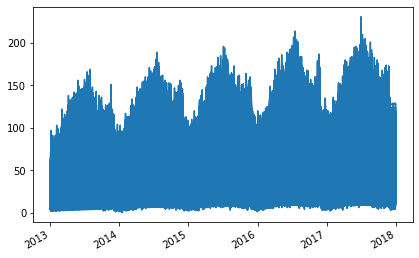

<Figure size 1512x864 with 0 Axes>

In [ ]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
plt.figure(figsize=(21, 12))
axis.plot(index,forecaste_open)

##3. VISUALIZING SALES TIMES SERIES DATA


In [ ]:
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

<Figure size 144x144 with 0 Axes>

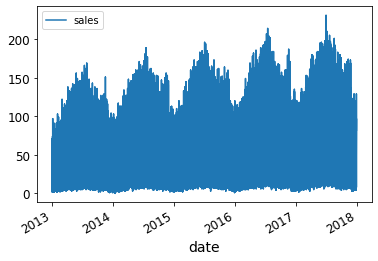

<Figure size 144x144 with 0 Axes>

In [ ]:
forecaste_open.plot()
plt.figure(figsize=(2, 2))

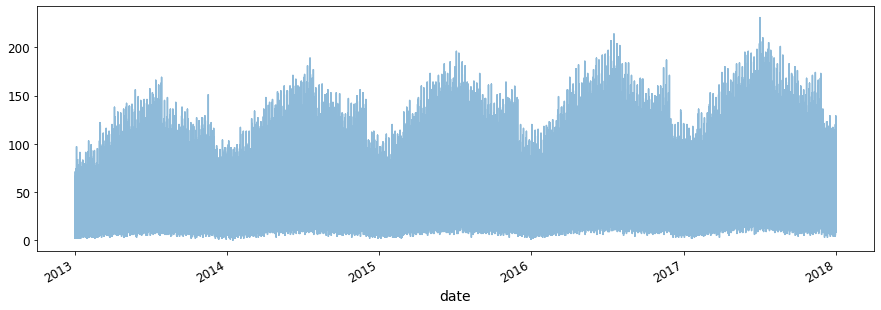

In [ ]:
forecaste_open[ 'sales'].plot(figsize = (15, 5), alpha = 0.5)

In [ ]:
my_series=pd.Series('df')

In [ ]:
type(my_series)

pandas.core.series.Series

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

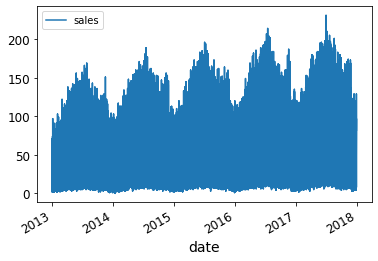

In [ ]:
df.plot()

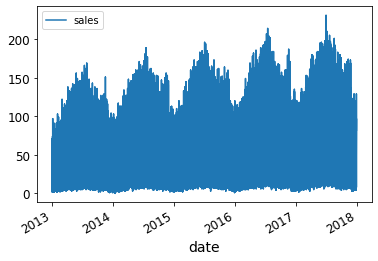

In [ ]:
forecaste_open.plot()

In [ ]:
result=seasonal_decompose(forecaste_open['sales'], model='Additive',period=12)

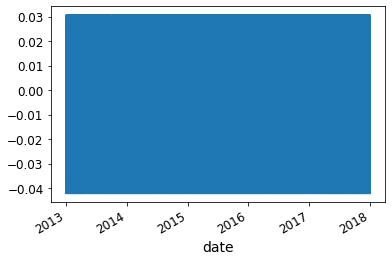

In [ ]:
result.seasonal.plot()

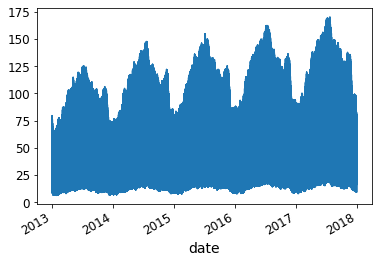

In [ ]:
result.trend.plot()

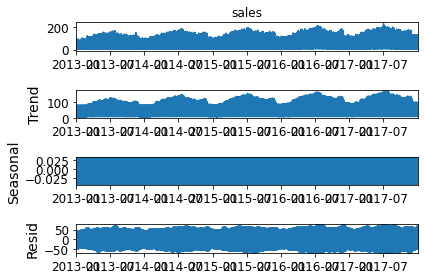

<Figure size 8712x11160 with 0 Axes>

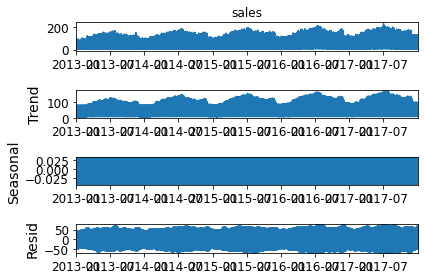

In [ ]:
plt.figure(figsize=(121, 155))
plt.tight_layout()
figure.autofmt_xdate()
result.plot()

##4.TIME SERIES FORECASTING WITH ARIMA 


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


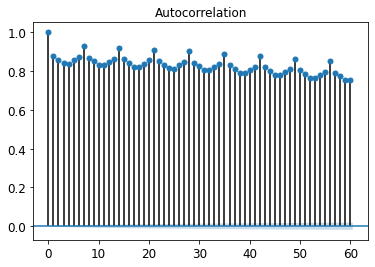

In [ ]:
acf = plot_acf(forecaste_open["sales"].dropna())

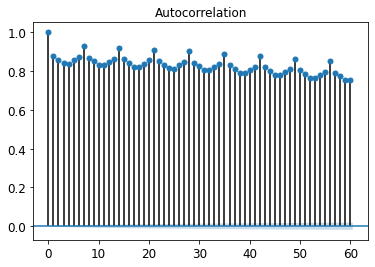

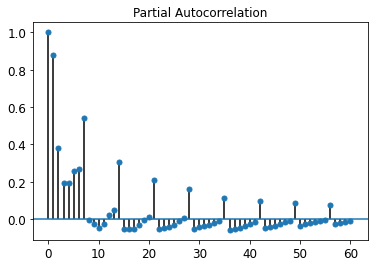

In [ ]:
acf = plot_acf(forecaste_open["sales"].dropna())
pacf = plot_pacf(forecaste_open["sales"].dropna())

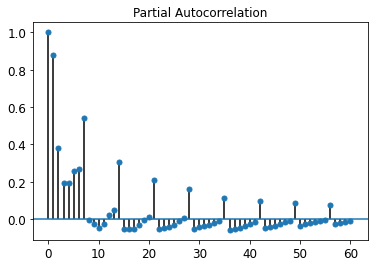

In [ ]:
result = plot_pacf(forecaste_open["sales"].dropna())

In [ ]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model_ARIMA=ARIMA(forecaste_open['sales'],order=(8,0,0))
model_Arima_fit=model_ARIMA.fit()

In [ ]:
model_Arima_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  sales   No. Observations:                  400
Model:                     ARMA(8, 0)   Log Likelihood               -1494.927
Method:                       css-mle   S.D. of innovations             10.119
Date:                Fri, 11 Nov 2022   AIC                           3009.854
Time:                        11:23:29   BIC                           3049.769
Sample:                             0   HQIC                          3025.661
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.5489      4.238     14.286      0.000      52.242      68.856
ar.L1.sales     0.1587      0.050      3.170      0.002       0.061       0.257
ar.L2.sales     0.0581      0.043      1.354      0.176      -0.026       0.142
ar.L3.sales     0.0074      0.043      0.171      0.865      -0.077       0.092
ar.L4.sales     0.0426      0.043      0.989      0.322      -0.042       0.127
ar.L5.sales     0.0444      0.043      1.031      0.303      -0.040       0.129
ar.L6.sales     0.0525      0.043      1.219      0.223      -0.032       0.137
ar.L7.sales     0.5381      0.043     12.547      0.000       0.454       0.622
ar.L8.sales    -0.0101      0.050     -0.200      0.841      -0.109       0.089
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0218           -0.0000j            1.0218           -0.0000
AR.2            0.6802           -0.8442j            1.0841           -0.1421
AR.3            0.6802           +0.8442j            1.0841            0.1421
AR.4           -1.0062           -0.4801j            1.1149           -0.4292
AR.5           -1.0062           +0.4801j            1.1149            0.4292
AR.6           -0.2343           -1.0899j            1.1148           -0.2837
AR.7           -0.2343           +1.0899j            1.1148            0.2837
AR.8           53.3996           -0.0000j           53.3996           -0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
train = forecaste_open.iloc[:len(forecaste_open)-12]
test = forecaste_open.iloc[len(forecaste_open)-12:] 

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['sales'], 
                order = (0, 1, 0), 
                seasonal_order =(7, 1, 1, 12))

In [ ]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                sales   No. Observations:                  388
Model:             SARIMAX(0, 1, 0)x(7, 1, [1], 12)   Log Likelihood               -1528.528
Date:                              Fri, 11 Nov 2022   AIC                           3075.057
Time:                                      11:58:58   BIC                           3110.399
Sample:                                           0   HQIC                          3089.088
                                              - 388                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1303      0.094     -1.380      0.168      -0.315       0.055
ar.S.L24      -0.0522      0.099     -0.525      0.600      -0.247       0.143
ar.S.L36      -0.1476      0.089     -1.650      0.099      -0.323       0.028
ar.S.L48      -0.1659      0.089     -1.869      0.062      -0.340       0.008
ar.S.L60      -0.0822      0.094     -0.879      0.379      -0.265       0.101
ar.S.L72      -0.0160      0.097     -0.165      0.869      -0.205       0.173
ar.S.L84       0.3691      0.075      4.917      0.000       0.222       0.516
ma.S.L12      -0.9971      1.688     -0.591      0.555      -4.305       2.311
sigma2       171.4001    279.305      0.614      0.539    -376.028     718.828
===================================================================================
Ljung-Box (L1) (Q):                  59.96   Jarque-Bera (JB):                 2.15
Prob(Q):                              0.00   Prob(JB):                         0.34
Heteroskedasticity (H):               0.47   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

In [ ]:
Predictions = result.predict(start, end,
                             typ = 'levels')

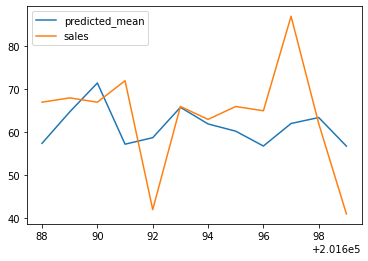

In [ ]:
Predictions.plot(legend = True)
test['sales'].plot(legend = True)

In [ ]:
#for MSE AND RMSE
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [ ]:
rmse(test["sales"], Predictions)

11.532194494991638

In [ ]:
mean_squared_error(test["sales"], Predictions)

132.9915098703154

In [ ]:
#forecasting using ARIMA Model

# Train the model on the full dataset
model = model = SARIMAX(forecaste_open['sales'], 
                        order = (8, 0, 0), 
                        seasonal_order =(2, 1, 1, 12))

In [ ]:
result = model.fit()

In [ ]:
Forecast = result.predict(start = len(forecaste_open), 
                          end = (len(forecaste_open)-1) + 3 * 12, 
                          typ = 'levels')

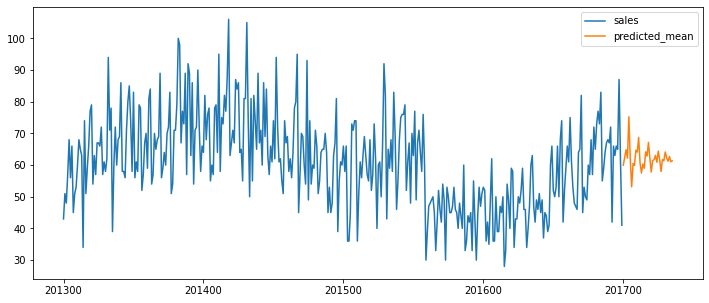

In [ ]:
# Plot the forecast values
forecaste_open['sales'].plot(figsize = (12, 5), legend = True)
Forecast.plot(legend = True)

##5. EDA (EXPLORATORY DATA ANALYSIS)


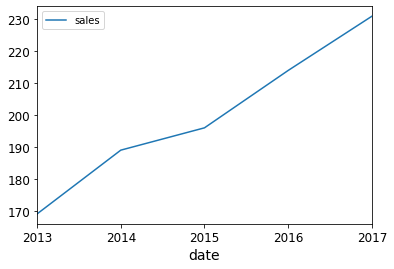

In [ ]:
#'A' is for year end frequency
df.resample(rule='A').max().plot()

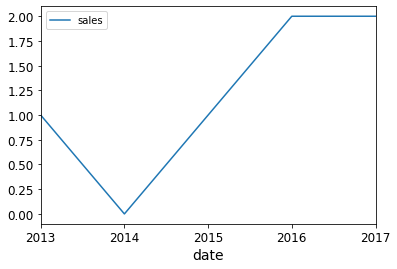

In [ ]:
df.resample(rule='A').min().plot()

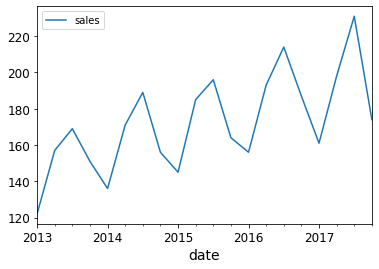

In [ ]:
#'QS' is for quarterly start frequency
df.resample(rule='QS').max().plot()

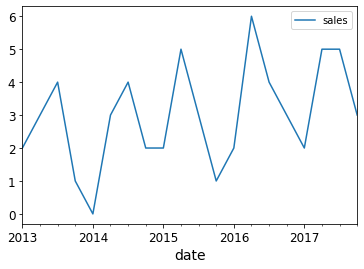

In [ ]:
df.resample(rule='QS').min().plot()

In [ ]:
df.resample(rule='QS').max()

,sales
date,
2013-01-01,122
2013-04-01,157
2013-07-01,169
2013-10-01,151
2014-01-01,136
2014-04-01,171
2014-07-01,189
2014-10-01,156
2015-01-01,145


In [ ]:
df.resample(rule='QS').min()

,sales
date,
2013-01-01,2
2013-04-01,3
2013-07-01,4
2013-10-01,1
2014-01-01,0
2014-04-01,3
2014-07-01,4
2014-10-01,2
2015-01-01,2


In [ ]:
forecaste_open.resample(rule='QS').max()

,sales
date,
2013-01-01,122
2013-04-01,157
2013-07-01,169
2013-10-01,151
2014-01-01,136
2014-04-01,171
2014-07-01,189
2014-10-01,156
2015-01-01,145


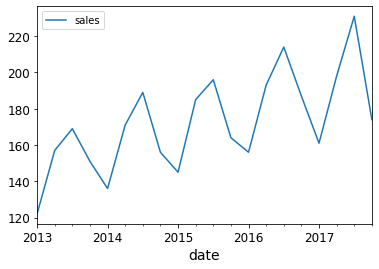

In [ ]:
forecaste_open.resample(rule='QS').max().plot()

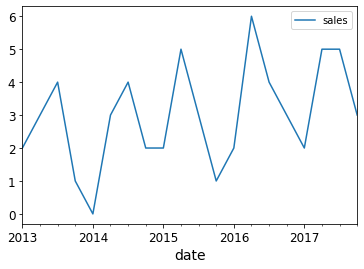

In [ ]:






forecaste_open.resample(rule='QS').min()
forecaste_open.resample(rule='QS').min().plot()

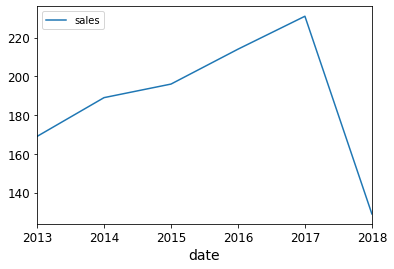

In [ ]:
#'BA' is for Business end frequency
df.resample(rule='BA').max().plot()

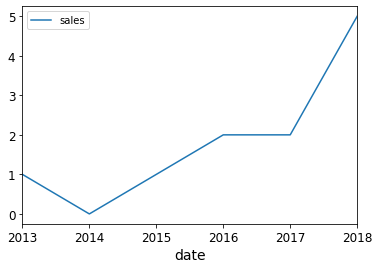

In [ ]:
df.resample(rule='BA').min().plot()

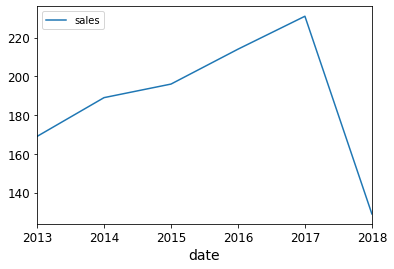

In [ ]:
forecaste_open.resample(rule='BA').max().plot()

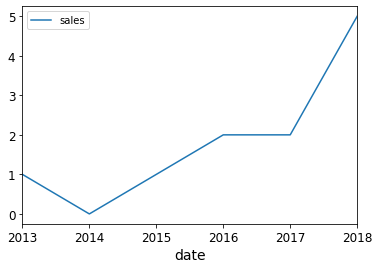

In [ ]:
forecaste_open.resample(rule='BA').min().plot()

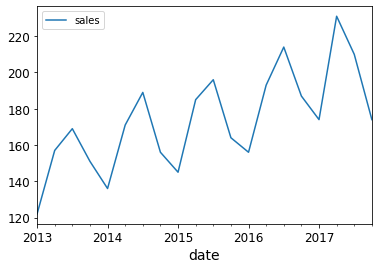

In [ ]:
#'BQS' is for Business quarterly start frequency
df.resample(rule='BQS').max().plot()

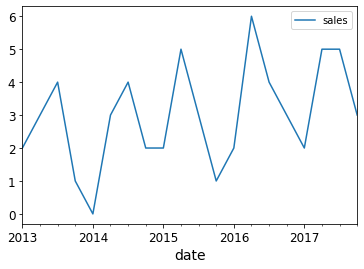

In [ ]:
df.resample(rule='BQS').min().plot()

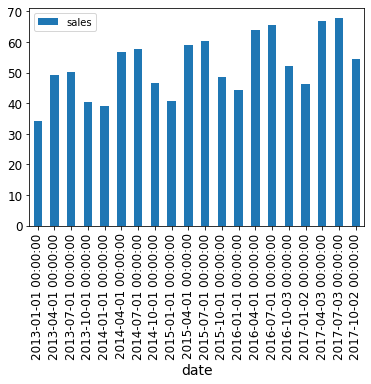

In [ ]:
df.resample(rule='BQS').mean().plot(kind='bar')

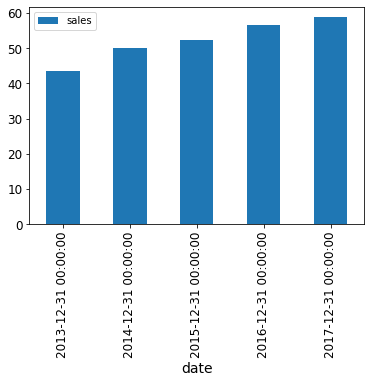

In [ ]:
df.resample(rule='A').mean().plot(kind='bar')

## 6. Forecasting using *fbProphet*

In [ ]:

df = pd.DataFrame()
df['ds'] = pd.to_datetime(forecaste_open['date'])
df['y'] = forecaste_open['sales']
df.head()

,ds,y
201300,2014-03-17,43
201301,2014-03-18,51
201302,2014-03-19,48
201303,2014-03-20,57
201304,2014-03-21,68


In [ ]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc60xne7c/vf268to3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc60xne7c/a99v8ngh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84224', 'data', 'file=/tmp/tmpc60xne7c/vf268to3.json', 'init=/tmp/tmpc60xne7c/a99v8ngh.json', 'output', 'file=/tmp/tmpc60xne7c/prophet_modelbwkc92dy/prophet_model-20221111120515.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:05:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:05:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=12 * 5, freq='M')

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
455,2019-11-30,350.502254,67.916081,654.542195,342.080622,64.989239,647.769786
456,2019-12-31,343.317380,54.186021,660.597902,347.228567,61.367067,661.389528
457,2020-01-31,354.497573,60.951750,673.950881,352.376511,55.519576,674.370585
458,2020-02-29,365.613963,66.290924,693.118238,357.192331,55.781805,689.313353
459,2020-03-31,358.429089,45.550807,696.081944,362.340276,48.914694,701.679694


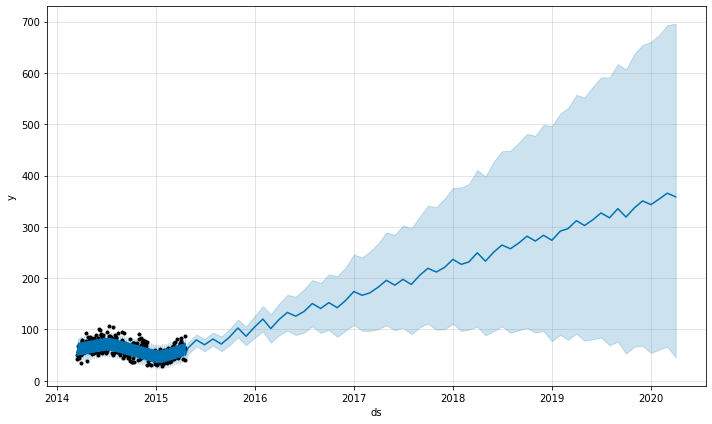

In [ ]:

fig1 = m.plot(forecast)

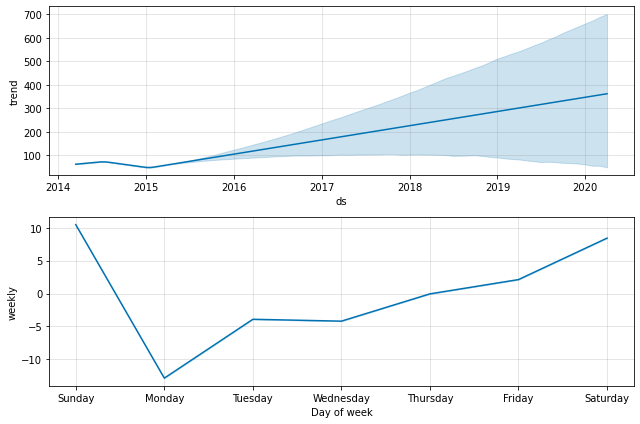

In [ ]:

fig2 = m.plot_components(forecast)

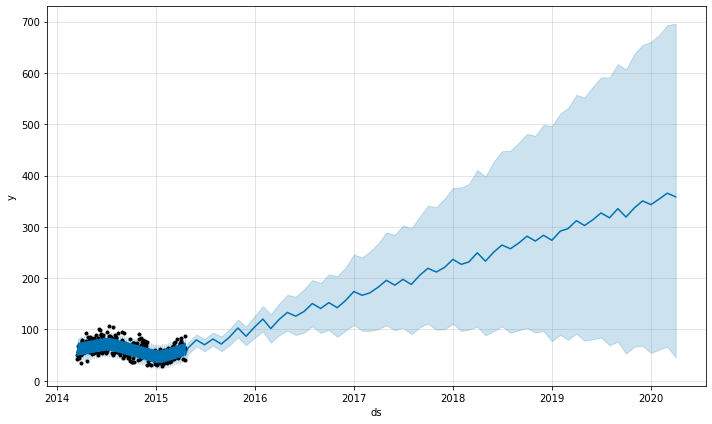

In [ ]:

fig = m.plot(forecast)

##THANK YOU!!!
**HAPPY LEARNING**
❤